# 대상 이미지를 resize 하고 list로 만드는 작업

- 각각 분석 마다 해당 작업을 수행할 경우 상당한 소요기간
- 소요기간 단축을 위해 주로 사용하는 이미지 크기마다 몇개의 파일을 만들어 놓고 사용

- 대표 모델
    - Resnet - input (224x224x3)
    - VGG16 - input (224x224x3)
    - LeNet - input (32x32x1) 흑백
    - AlexNet - input(227x227x3)
    - Inception-v3 - input(299x299x3)

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np

import os
import warnings
warnings.filterwarnings(action='ignore')


In [3]:
### 사용자 정의 함수
%cd /content/drive/MyDrive/project3/

# Add the paths to the modules to the Python path
import sys
sys.path.append(os.path.abspath('./code/image_function'))

from image_load import resize_image, load_image, load_and_resize_images, convert_to_threshold
from vram_reset import reset_vram

# reset_vram() - > vram 초기화

/content/drive/.shortcut-targets-by-id/1gdU-KuXDUU7v2o8X7TdV0JgGiz603mCc/project3


In [4]:
# 데이터 경로 지정

datadir = '/content/drive/MyDrive/project3/data/traindata/kfood/'

file_list = os.listdir(datadir)

# sub_dir만 선택
folder_list = [folder for folder in file_list if os.path.isdir(os.path.join(datadir, folder))]

# 리스트 정렬
food_middle_list = sorted(folder_list)

print(food_middle_list[:5])

['구이', '국', '기타', '김치', '나물']


In [5]:
food_middle_list

['구이',
 '국',
 '기타',
 '김치',
 '나물',
 '떡',
 '만두',
 '면',
 '무침',
 '밥',
 '볶음',
 '쌈',
 '음청류']

In [6]:
#  데이터 경로 만들기

food_list = [] # 음식이름
food_path_list = [] # 음식이름 경로

for food_middle in food_middle_list:
    middle_path = os.path.join(datadir,food_middle)
    food_name_list = os.listdir(middle_path)

    for food in food_name_list:
        path = os.path.join(middle_path,food)
        food_path_list.append(path)

        name = path.split('/')[-1]
        food_list.append(name)

print(len(food_list))
print(food_list)
print(food_path_list)

99
['갈비구이', '갈치구이', '고등어구이', '곱창구이', '닭갈비', '장어구이', '조개구이', '떡갈비', '불고기', '삼겹살', '더덕구이', '조기구이', '황태구이', '훈제오리', '콩나물국', '계란국', '떡국_만두국', '시래기국', '무국', '북엇국', '미역국', '육개장', '과메기', '편육', '콩자반', '양념치킨', '피자', '후라이드치킨', '젓갈', '갓김치', '깍두기', '나박김치', '무생채', '배추김치', '부추김치', '열무김치', '백김치', '총각김치', '오이소박이', '파김치', '가지볶음', '고사리나물', '미역줄기볶음', '숙주나물', '시금치나물', '애호박볶음', '송편', '꿀떡', '경단', '만두', '장', '적', '장아찌', '전', '전골', '조림', '라면', '쫄면', '짬뽕', '물냉면', '짜장면', '비빔냉면', '수제비', '막국수', '잔치국수', '열무국수', '칼국수', '콩국수', '도토리묵', '콩나물무침', '꽈리고추무침', '도라지무침', '잡채', '홍어무침', '회무침', '김밥', '김치볶음밥', '누룽지', '알밥', '비빔밥', '자

# 필요한 이미지 타입별 list 생성

- type1 = 224 * 224 * 3 sizes
    - Resnet - input (224x224x3)
    - VGG16 - input (224x224x3)

- type2 = 227 * 227 * 3 sizes
    - AlexNet - input(227x227x3)

- type3 = 299 * 299 * 3 sizes
    - Inception-v3 - input(299x299x3)

In [ ]:
image_set_types = [
    {'name' : 'type1', 'type': '224_224_3', 'size': (224, 244), 'pic_count': 1000, 'food_count': 150, 'gray' : False},
    {'name' : 'type1_g', 'type': '224_224_3', 'size': (224, 244), 'pic_count': 1000, 'food_count': 150, 'gray' : True},
    {'name' : 'type2', 'type': '227_227_3', 'size': (227, 227), 'pic_count': 1000, 'food_count': 150, 'gray' : False},
    {'name' : 'type2_g', 'type': '227_227_3', 'size': (227, 227), 'pic_count': 1000, 'food_count': 150, 'gray' : True},
    {'name' : 'type3', 'type': '299_299_3', 'size': (299, 299), 'pic_count': 1000, 'food_count': 150, 'gray' : False},
    {'name' : 'type3_g', 'type': '299_299_3', 'size': (299, 299), 'pic_count': 1000, 'food_count': 150, 'gray' : True}
    ]

for image_set in image_set_types:
    print(image_set['name'])

    new_img_size = image_set['size']
    pic_count = image_set['pic_count']
    food_count = image_set['food_count']
    food_path_list2 = food_path_list[:food_count]
    gray = image_set['gray']


    image_list, target_list, except_list = load_and_resize_images(food_path_list2, food_list, img_size = new_img_size, pic_cnt = pic_count, grayscale =  gray )

    file_name = f"/content/drive/MyDrive/project3/data/traindata/food_image_list/{image_set['name']}_{image_set['type']}.npz"
    np.savez_compressed(file_name, image_list=image_list, target_list=target_list)


    print('image: ', image_list.shape)
    print('target: ', target_list.shape)
    print('\n')

type1


Processing images:   0%|          | 0/50 [01:02<?, ?it/s]


# 1개 개별 이미지 만드는 경우

In [7]:
image_set_type1 = {'type' : '224_224_3',
             'size' : (224, 244),
             'pic_count' : 15,
             'food_count' : 10,
            'gray' : False}
image_set = image_set_type1

new_img_size = image_set['size']
pic_count = image_set['pic_count']
food_count = image_set['food_count']
gray = image_set['gray']
food_path_list2 = food_path_list[:food_count]

image_list, target_list, except_list = load_and_resize_images(food_path_list2, food_list, img_size = new_img_size, grayscale =  gray )

file_name = f"/content/drive/MyDrive/project3/data/traindata/food_image_list/list_{image_set['type']}.npz"
np.savez_compressed(file_name, image_list=image_list, target_list=target_list)

print('image: ', image_list.shape)
print('traget: ', target_list.shape)

Processing images: 100%|██████████| 10/10 [00:41<00:00,  4.19s/it]


image:  (999, 244, 224, 3)
traget:  (999,)


# Threshold

In [8]:
import cv2
from google.colab.patches import cv2_imshow

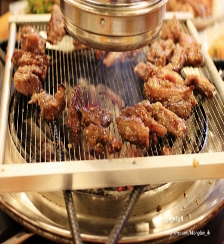

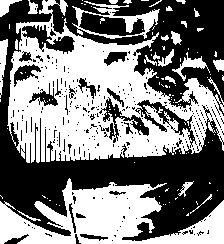

In [9]:
test_image_list = convert_to_threshold(image_list, threshold_value=20, max_value=255, flags = cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)
cv2_imshow(image_list[1])
cv2_imshow(test_image_list[1])

In [ ]:
# import cv2

# thresholded_images = []

# for i in range(image_list.shape[0]):
#     img = image_list[i]
#     img = img.astype(np.uint8)
#     # 그레이스케일로 변환
#     # img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

#     # 이진화 (Threshold)
#     _, binary_img = cv2.threshold(img, 125, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

#     thresholded_images.append(binary_img)

# # 리스트를 numpy 배열로 변환
# thresholded_images = np.array(thresholded_images)

# print('Thresholded images shape:', thresholded_images.shape)

Thresholded images shape: (999, 244, 224)


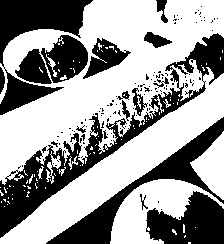